# PREDICTING RISING FOOD PRICES IN INDIA

In [1]:
#imporrting Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression


In [34]:
data = pd.read_csv(r'C:\Users\admin\Desktop\Data Analytics\wfp_food_prices_ind.csv')

In [35]:
data.head(10)

,date,state,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.00,0.2545
1,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.00,0.1590
2,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.50,0.4294
3,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.00,0.9860
4,1/15/1994,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.80,0.2163
5,1/15/1994,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Wheat,KG,actual,Retail,INR,6.20,0.1972
6,1/15/1994,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.50,0.4294
7,1/15/1994,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,oil and fats,Oil (mustard),KG,actual,Retail,INR,30.00,0.9542
8,1/15/1994,Himachal Pradesh,Shimla,Shimla,31.103333,77.172222,cereals and tubers,Rice,KG,actual,Retail,INR,9.00,0.2863
9,1/15/1994,Himachal Pradesh,Shimla,Shimla,31.103333,77.172222,miscellaneous food,Sugar,KG,actual,Retail,INR,13.75,0.4373


### DATA NORMALIZATION

In [36]:
# Extracting the year from the date column

data['year'] = pd.DatetimeIndex(data['date']).year
data['year']=data['year'].astype(object)

In [37]:
data.head()

,date,state,city,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year
0,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545,1994
1,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.1590,1994
2,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294,1994
3,1/15/1994,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.9860,1994
4,1/15/1994,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,actual,Retail,INR,6.8,0.2163,1994


In [38]:
data.drop(["date", "currency","priceflag"],axis = 1 ,inplace = True)

In [39]:
data.head()

,state,city,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,year
0,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.0,0.2545,1994
1,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,Retail,5.0,0.1590,1994
2,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.5,0.4294,1994
3,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.0,0.9860,1994
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.8,0.2163,1994


In [40]:
data.shape

(172017, 12)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172017 entries, 0 to 172016
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   state      171228 non-null  object 
 1   city       171228 non-null  object 
 2   market     172017 non-null  object 
 3   latitude   171228 non-null  float64
 4   longitude  171228 non-null  float64
 5   category   172017 non-null  object 
 6   commodity  172017 non-null  object 
 7   unit       172017 non-null  object 
 8   pricetype  172017 non-null  object 
 9   price      172017 non-null  float64
 10  usdprice   172017 non-null  float64
 11  year       172017 non-null  object 
dtypes: float64(4), object(8)
memory usage: 15.7+ MB


In [42]:
 #Checking null values in dataset

In [43]:
data.isnull().sum()

state        789
city         789
market         0
latitude     789
longitude    789
category       0
commodity      0
unit           0
pricetype      0
price          0
usdprice       0
year           0
dtype: int64

In [44]:
#Replacing Null values

data['state'].replace(np.nan, 'unknown', inplace=True)
data = data[data['state']!='unknown']

In [45]:
data.isnull().sum()

state        0
city         0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
pricetype    0
price        0
usdprice     0
year         0
dtype: int64

### DATA ANALYSIS AND VISUALIZATION

In [46]:
#Analysing number of unique entries in the category and the commodity columns

In [47]:
data['category'].unique()

array(['cereals and tubers', 'miscellaneous food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits', 'milk and dairy'],
      dtype=object)

In [48]:
data['commodity'].unique()

array(['Rice', 'Wheat', 'Sugar', 'Oil (mustard)', 'Potatoes', 'Chickpeas',
       'Onions', 'Milk', 'Wheat flour', 'Milk (pasteurized)',
       'Salt (iodised)', 'Oil (groundnut)', 'Oil (palm)',
       'Oil (sunflower)', 'Lentils (masur)', 'Tomatoes', 'Tea (black)',
       'Lentils', 'Sugar (jaggery/gur)', 'Ghee (vanaspati)',
       'Lentils (moong)', 'Lentils (urad)', 'Oil (soybean)'], dtype=object)

In [49]:
#There are some 23 commodities categorised into 6 categories in the dataset

In [50]:
data['pricetype'].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [51]:
data.groupby(['category','pricetype'])['price'].agg('mean')

category               pricetype
cereals and tubers     Retail         23.774086
                       Wholesale    1672.226135
milk and dairy         Retail         42.910396
miscellaneous food     Retail         77.259278
                       Wholesale    3259.008085
oil and fats           Retail        118.484759
pulses and nuts        Retail         87.815780
vegetables and fruits  Retail         29.126531
Name: price, dtype: float64

In [52]:
#It would be useful to compare the retail and wholesale prices of commodities, but since both price types arent available,for all commodities, let's proceed to analyse the retail prices of all commodities and their movement over the years
#Create a separate dataset consisting only of retail prices

In [53]:
data_retail = data[data['pricetype'] == "Retail"]

In [54]:
data_retail.head()

,state,city,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,year
0,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.0,0.2545,1994
1,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,Retail,5.0,0.1590,1994
2,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,Retail,13.5,0.4294,1994
3,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,Retail,31.0,0.9860,1994
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.8,0.2163,1994


In [55]:
#Plotting the movement of category prices over the years

category_prices = data_retail.groupby(['category','year'])['price'].agg('mean')

In [56]:
category_prices = category_prices.reset_index()

In [57]:
category_prices

,category,year,price
0,cereals and tubers,1994,7.032427
1,cereals and tubers,1995,6.977457
2,cereals and tubers,1996,8.334412
3,cereals and tubers,1997,9.067335
4,cereals and tubers,1998,9.371254
...,...,...,...
134,vegetables and fruits,2018,23.763239
135,vegetables and fruits,2019,39.329229
136,vegetables and fruits,2020,37.188580
137,vegetables and fruits,2021,31.771599


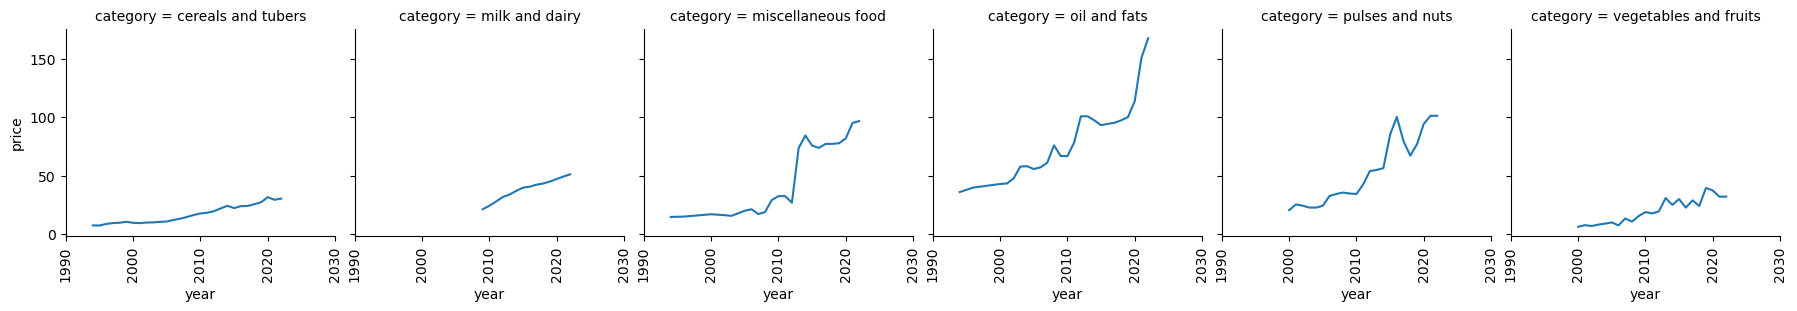

In [58]:
#Creating a linepot to see the price movement of categories over the years

g = sns.FacetGrid(category_prices,col='category')
g.map(sns.lineplot,'year','price')
g.set_xticklabels(rotation=90)

In [59]:
#Seems that the price of oil and fats has risen steeply over the last 6-7 years, 
#whereas the price for pulses and nuts has seen an uneven movement

In [60]:
rice =data[data['commodity'] == "Rice"]

In [71]:
rice.head()

,state,city,market,latitude,longitude,category,commodity,unit,pricetype,price,usdprice,year
0,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,Retail,8.0,0.2545,1994
4,Gujarat,Ahmadabad,Ahmedabad,23.033333,72.616667,cereals and tubers,Rice,KG,Retail,6.8,0.2163,1994
8,Himachal Pradesh,Shimla,Shimla,31.103333,77.172222,cereals and tubers,Rice,KG,Retail,9.0,0.2863,1994
17,Maharashtra,Mumbai city,Mumbai,18.975000,72.825833,cereals and tubers,Rice,KG,Retail,7.5,0.2385,1994
24,Telangana,Hyderabad,Hyderabad,17.375278,78.474444,cereals and tubers,Rice,KG,Retail,6.2,0.1972,1994


In [72]:
riceprice = rice.groupby('year')['price'].agg('mean')

In [73]:
riceprice = riceprice.reset_index()

In [80]:
riceprice

,year,price
0,1994,7.954800
1,1995,8.151724
2,1996,9.111022
3,1997,9.670681
4,1998,10.218508
5,1999,11.307353
6,2000,212.822780
7,2001,314.593425
8,2002,195.524335
9,2003,193.354346


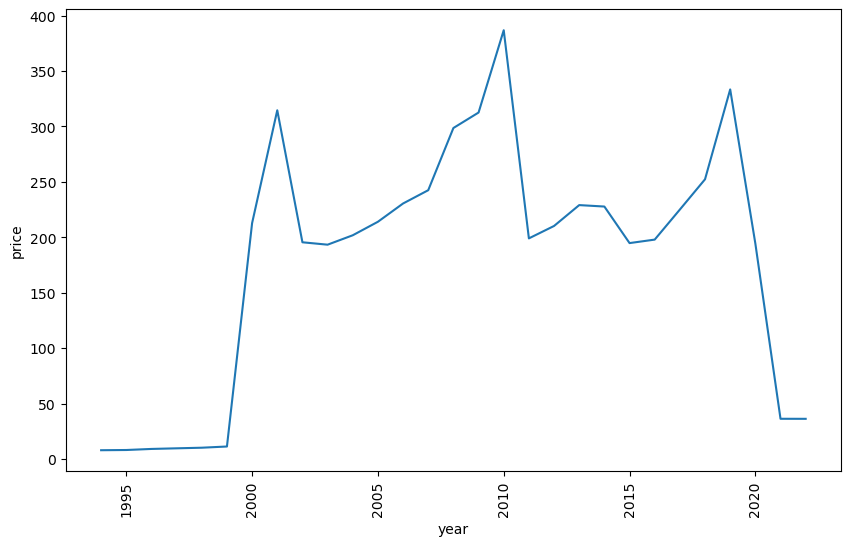

In [91]:
plt.figure(figsize=(10,6))
sns.lineplot(riceprice.year,riceprice.price)
plt.xticks(rotation=90)
plt.show()

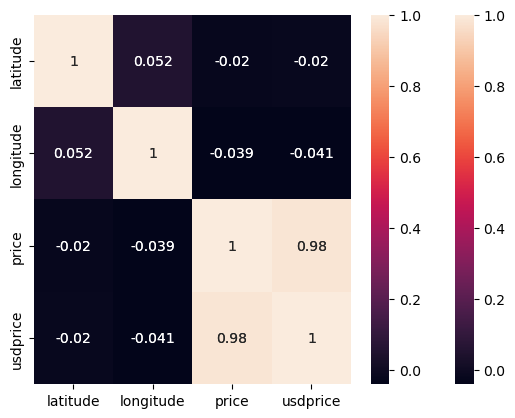

In [90]:
cor = data.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [92]:
data.drop(["latitude", "longitude"],axis = 1 ,inplace = True)

In [93]:
data.head()

,state,city,market,category,commodity,unit,pricetype,price,usdprice,year
0,Delhi,Delhi,Delhi,cereals and tubers,Rice,KG,Retail,8.0,0.2545,1994
1,Delhi,Delhi,Delhi,cereals and tubers,Wheat,KG,Retail,5.0,0.1590,1994
2,Delhi,Delhi,Delhi,miscellaneous food,Sugar,KG,Retail,13.5,0.4294,1994
3,Delhi,Delhi,Delhi,oil and fats,Oil (mustard),KG,Retail,31.0,0.9860,1994
4,Gujarat,Ahmadabad,Ahmedabad,cereals and tubers,Rice,KG,Retail,6.8,0.2163,1994


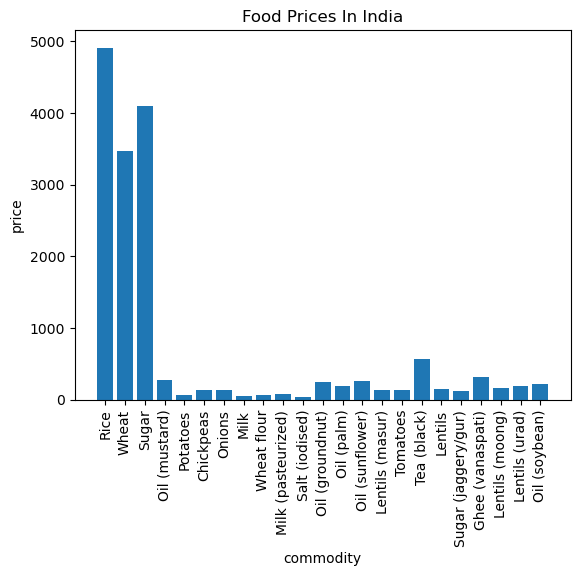

In [95]:

X = data['commodity']
y = data['price']
plt.bar(X, y)
plt.title("Food Prices In India")
plt.ylabel('price')
plt.xlabel('commodity')
plt.xticks(rotation=90)
plt.show()

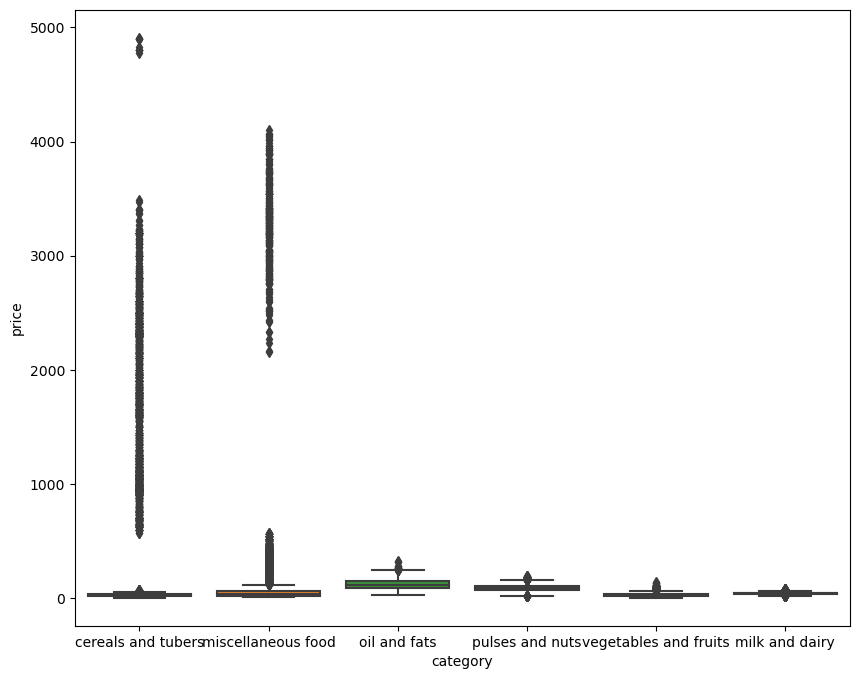

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=data['category'], y=data['price'])
plt.show()

### DATA PRE-PROCESSING
SCALING AND ENCODING

In [100]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data['price'] = mms.fit_transform(data[['price']])
data['usdprice'] = mms.fit_transform(data[['usdprice']])
data.head()

,state,city,market,category,commodity,unit,pricetype,price,usdprice,year
0,Delhi,Delhi,Delhi,cereals and tubers,Rice,KG,Retail,0.001121,0.002234,1994
1,Delhi,Delhi,Delhi,cereals and tubers,Wheat,KG,Retail,0.000509,0.001158,1994
2,Delhi,Delhi,Delhi,miscellaneous food,Sugar,KG,Retail,0.002241,0.004205,1994
3,Delhi,Delhi,Delhi,oil and fats,Oil (mustard),KG,Retail,0.005807,0.010479,1994
4,Gujarat,Ahmadabad,Ahmedabad,cereals and tubers,Rice,KG,Retail,0.000876,0.001803,1994


In [101]:
data1 = pd.get_dummies(data['state'],drop_first=True)
data2 = pd.get_dummies(data['city'],drop_first=True)
data3 = pd.get_dummies(data['market'],drop_first=True)
data4 = pd.get_dummies(data['category'],drop_first=True)
data5 = pd.get_dummies(data['commodity'],drop_first=True)
data6 = pd.get_dummies(data['unit'],drop_first=True)
data7 = pd.get_dummies(data['pricetype'],drop_first=True)

In [102]:
data.drop(['state','city','market','category','commodity','unit','pricetype'],axis=1,inplace=True)

In [103]:
data = pd.concat([data,data1,data2,data3,data4,data5,data6,data7],axis=1)
data.head()

,price,usdprice,year,Andhra Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,...,Salt (iodised),Sugar,Sugar (jaggery/gur),Tea (black),Tomatoes,Wheat,Wheat flour,KG,L,Wholesale
0,0.001121,0.002234,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000509,0.001158,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,0.002241,0.004205,1994,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.005807,0.010479,1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.000876,0.001803,1994,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### MACHINE LEARNING

In [113]:
x = data.iloc[:, :1]
y = data.iloc[:, 1]

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [116]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [117]:
y_pred = lr.predict(x_test)

In [118]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9609968845386055